# First Project Work Week Assignment



# We need to remember to render the Jupyter Notebook. Google nbviewer


## Business Understanding

Business applications of predicting an overall default rate could include capcacity planning and financial reporting.  However, the ability to predict whether an individual customer will default is also an important aspect of managing the profitability of a credit card business.  

Projecting the likelihood of default for a given customer can be used to:

1. Determine the collection strategy if a customer misses a payment, and 
2. Determine the appropriate credit limit for that customer.

It should be noted that an inaccurate projection in either direction when used to determine how a customer will be treated can adversely impact profitability.  If the risk is overestimated, collection efforts may be too intense thereby alienating customers and unnecessarily constraining credit lines.  Restricing credit lines too much may inhibit customers' ability and willingness to use the product.  If the risk is underestimated, the bank will incur higher losses than it might otherwise.  We expect that a more acceptable bias would be to overestimate the likelihood of default rather than underestimate it.

#### ** Measuring the Succsess of an Algorithm **

We will set aside a portion of the data for validation (the test set), and use Logistic Regression on the remaining training set.

The effectiveness of the model in predicting an overall default rate will be measured by its performance when applied to the hold-out set.  If the actual results are within 10% of the estimate, we will deem it to be successful.  We will also use the AUC against the test set.  Judgmentally, we will consider an AUC of 80% or more acceptable.

To test the effectiveness of the model for use in determining the course of action with respect to a specific customer we will look for specificity and sensitivity rates at certain probabilities of default.  In order to determine whether a "lighter" collection strategy should be used, we will look for those probabilities where the sensitivity (true positive rate) is greater than 90%. In order to determine that a request to increase credit will be declined, we will look for those probabilities where the specificity is 90% or more. 

#### ** Goal **
The goal of this analysis is to predict the probablity of default for credit card customers.

## Data Meaning Type

#### Attribute Information
The data used is "Default of Credit Card Clients" from UCI. It was attained by I-Cheng Yeh with Chung Hua University and Tamkang University in Taiwan. The original goal was to predict default rates.

The data has a 6 month history of 30,000 Taiwanese credit account balances and transactions.

Each observation contains a binary reponse variable "default" with values 1 indicating a default occured and 0 indicating no default occured.

The following explanatory variables are included:

 - LIMIT_BAL = Total credit amount allowed
 
 - SEX
     -  1 = Male
     -  2 = Female
 
 - EDUCATION
     - 1 = Graduate School
     - 2 = University
     - 3 = High School
     - 4 = Other
   
 - MARRIAGE
     - 1 = Married
     - 2 = Single
     - 3 = Other
       
 - AGE = Credit holder age in years
 
Payment history (2005)
 - PAY_0 = September
 - PAY_2 = August
 - PAY_3 = July
 - PAY_4 = June
 - PAY_5 = May
 - PAY_6 = April
      -  -1 = payment received on time
      -   1 = payment received one month late
      -   2 = payment received two months late
      -   "......"
      -   9 = payment received nine months late or more
         
Statement amount (NT dollars, 2005)
 - BILL_AMT1 = September
 - BILL_AMT2 = August
 - BILL_AMT3 = July
 - BILL_AMT4 = June
 - BILL_AMT5 = May
 - BILL_AMT6 = April
 
Payment amount (NT dollars, 2005).
 - PAY_AMT1 = September
 - PAY_AMT2 = August
 - PAY_AMT3 = July
 - PAY_AMT4 = June
 - PAY_AMT5 = May
 - PAY_AMT6 = April

Original Source Data Set Information  
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [1]:
#import the data
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.index = df.ID
if 'ID' in df:
    del df['ID']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

Pandas defaulted all data types to integer.
The source has no explicit data type descriptions but there is enough context to safely change the datatypes of all continuous variables to floats.

In [3]:
#Create Lists for Analysis
BillsAndPayments=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
Bills=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default']
Payments=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']
PayStatus=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']
PayStausOnly = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']
ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default']
pca_features = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
#Convert datatypes
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df_pca = df[pca_features].astype(np.int64)
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

## Data Quality

#### No values coded as missing, or empty cells in the CSV file provided.

#### Field definitions and naming:
1.  The naming convention of the Payment, Bill and Payment Status fields are that the calendar month of the attribute is given by sequential integers at the end of the name. The PAY_N fields go from PAY_0 to PAY_2.  We are assuming that PAY_0 is really PAY_1.
2.  The descriptions of values -2 and 0 in the PAY_N fields are not provided.  Based on visual inspection, a value of -2 appears to indicate that no payment is due because the account has a credit balance.  Because a value of -1 means "Paid on time" and a value of 1 means one month late, we are assuming that a value of zero means less than one month late.It may be that these are missing values coded as 0.  About half of the data set has a value of 0 for these attributes.
3.  Values for the Marriage attribute of 0 is undefined.  There are only 54 instances.  We treated these as "Other", which has 323 Instances.
    
#### Suspicious values:
1.  There are only 34 instances where the Pay Status had a value of 1 for two months in a row.  This is highly unusual 
    given the propensity for customers with status values of 1 or 2 to remain in their current payment status for one month. 
    This propensity is seen in a table (cell XX) in the Joint Attribute section.
2.  It appears that the first month the value of 1 is used is in PAY_0, with only a few observations prior to that.  
    Therfore, it seems that there is a methodology change part-way through the data series.  We will proceed with caution 
    since the number of observations is small.  The values can be seen in a table (cell XX) in the Joint Attribute section.
3.  There are instances where the Payment Status implies late payment, but the amount billed was zero or less.  This seems
    nonsensical.  Thee are 1,769 such cases (out of 150,000 possible payments:  30,000 accounts and 5 months of validatable 
    data) if measured against payment statuses defined as delinquent by the data providers, and 4,702 if we consider Payment
    Status of zero as delinquent.  The code which calculates these figures is in cell XX in the Join Attribute Section.
    
#### Outliers:
The range of values in the Payment, Amount Billed and Credit Limit fields is extremely wide, and the distributions are right-skewed.  (Shown in sections below)  We explored a sample of outliers in these fields, and concluded that the observations were legitimate.  High payments were consistent with amouts billed, high balances were often recurring and consistent with credit limits.  Distributions of other variables seem reasonable.

## Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

In [4]:
# Describing the data set in two sections so we can see the values for all columnts.
df[['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default']].describe()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [5]:
df[continuous_features].describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


The tables above show summary statistics for all the variables in the data set.  Findings Include:
- We can see that the average person is 35 years old woman, who graduated school and pays her bills on time.
- Continuous Variables appear right-skewed with large ranges.
- Billed Amounts seem to be increasing with time, but the pattern appears less clear with Payment Amounts.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
# find the percentage of people who were default
percentDefault = float(len(df[df.default != 0]))/len(df) * 100
print (percentDefault)

22.12


Overall, the percentage of clients in the data set who defaulted on their credit cards is 22.12%.  This matches the mean from the data frame describe() function in the table above.  It gives us an indication of the robustness of the data set in terms of the variable we will be predicting.

In [7]:
df.groupby(by=df.default).mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [8]:
(130109.65-178099.72)/178099.72

-0.26945617881937156

The average credit limit (LIMIT_BAL) for clients who defaulted is 26.94% lower than those who did not. The bank may be successfully limiting credit to those it deems riskier.

History of delinquency in the above table (PAY_0 - PAY_6) confirms that the lateness of payments made appears related to default.

In [9]:
df.groupby(by=df.EDUCATION).mean()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,217142.857143,1.428571,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,-1.357143,...,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,...,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,-0.521429,...,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,-0.647059,...,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


At 25.15%, those with a high school education have the highest default rate.  The "Other/undefined" categories are the lowest.

## Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [10]:
df.groupby(by=df.SEX).mean()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
SEX,,,,,,,,,,,,,,,,,,,,,
1,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,-0.228634,...,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
2,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,-0.332100,...,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763


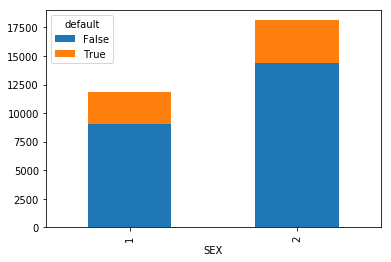

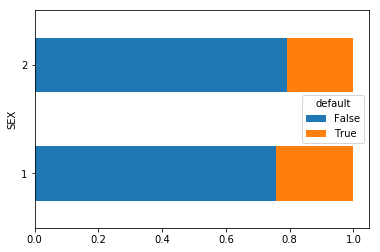

In [11]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

Default_counts = pd.crosstab([df['SEX']], df.default.astype(bool))
# Default_counts.plot(kind='bar', stacked=True, color=['grey','blue'])
Default_counts.plot(kind='bar', stacked=True)

# divide the counts to get rates
Default_rate = Default_counts.div(Default_counts.sum(1).astype(float),axis=0)
# Default_rate.plot(kind='barh', stacked=True, color=['grey','blue'])
Default_rate.plot(kind='barh', stacked=True)

It satisfies our curiosity that 21% of women default, while 24% of men default.  It is also interesting that 60% of the data set is women.  It is not clear from these statistics alone whether gender is a meaningful factor in estimating default rates after other variables are considered.  

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x0000026038CEECF8>>

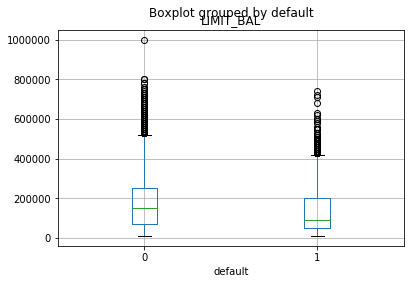

In [12]:
# import seaborn as sns
# sns.set(style="whitegrid")
# ax = sns.boxplot(x=df['LIMIT_BAL'])

a = df.boxplot(column='LIMIT_BAL', by = 'default')
a.set_yscale

The boxplot above shows that credit limits (LIMIT_BAL) tend to be lower overall for those who default than those who don't.  It is not just a matter of the average being 26.94% lower as noted earlier.

This could be interesting because the bank may be successfully managing its risk through limits, which could indicate factors at work in the data other than the attributes provided.  The limits could be set on variables not provided, and changes in their credit granting processes could impact the default rates without change in the attributes provided.  It also shows that the credit limit could provide value as an explanatory variable.

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x0000026039281940>>

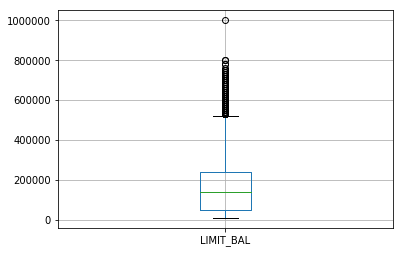

In [13]:
b = df.boxplot(column='LIMIT_BAL')
b.set_yscale

From the boxplot we see that Credit limits are right-skewed, with the max for the top 90% of the data around $500,000, a median of $140,000 and a potential outlier at $1 million. 

We believe that the $1million point is valid because billed amounts are consistent with that limit.  We also checked some of the others, and didn't see any potential data issues.  We may want to be mindful of the extreme spread in credit limits, because such a spread may create modelling issues and we may want to cluster customers into similar groups.

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x00000260392E1A90>>

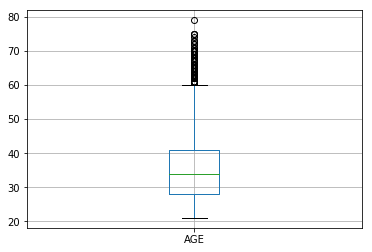

In [14]:
c = df.boxplot(column='AGE')
c.set_yscale

The age variable seems pretty clean.  90% of the observations are between 21 and 60. Mean age is 35 years, and the median is 34, so the skew doesn't seem to dominate most of the data.

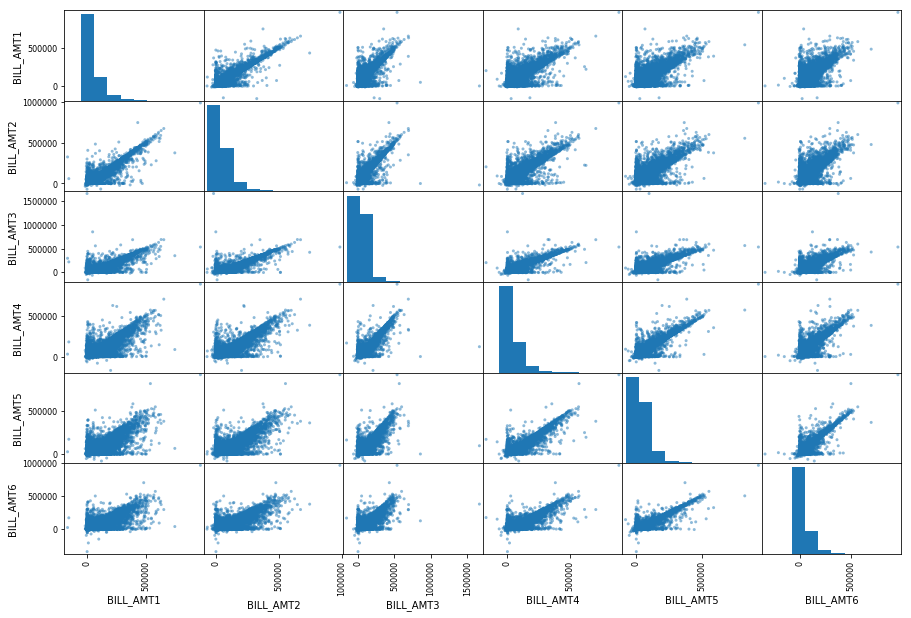

In [15]:
from pandas.plotting import scatter_matrix
ax=scatter_matrix(df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]],figsize=(15,10))

We see on the scatter matrix high correlation between amounts of bill statements. All BILL_AMT distributions are right skewed.  There are also indications of outliers.  We looked at a small sample, and saw no reason to question the data.

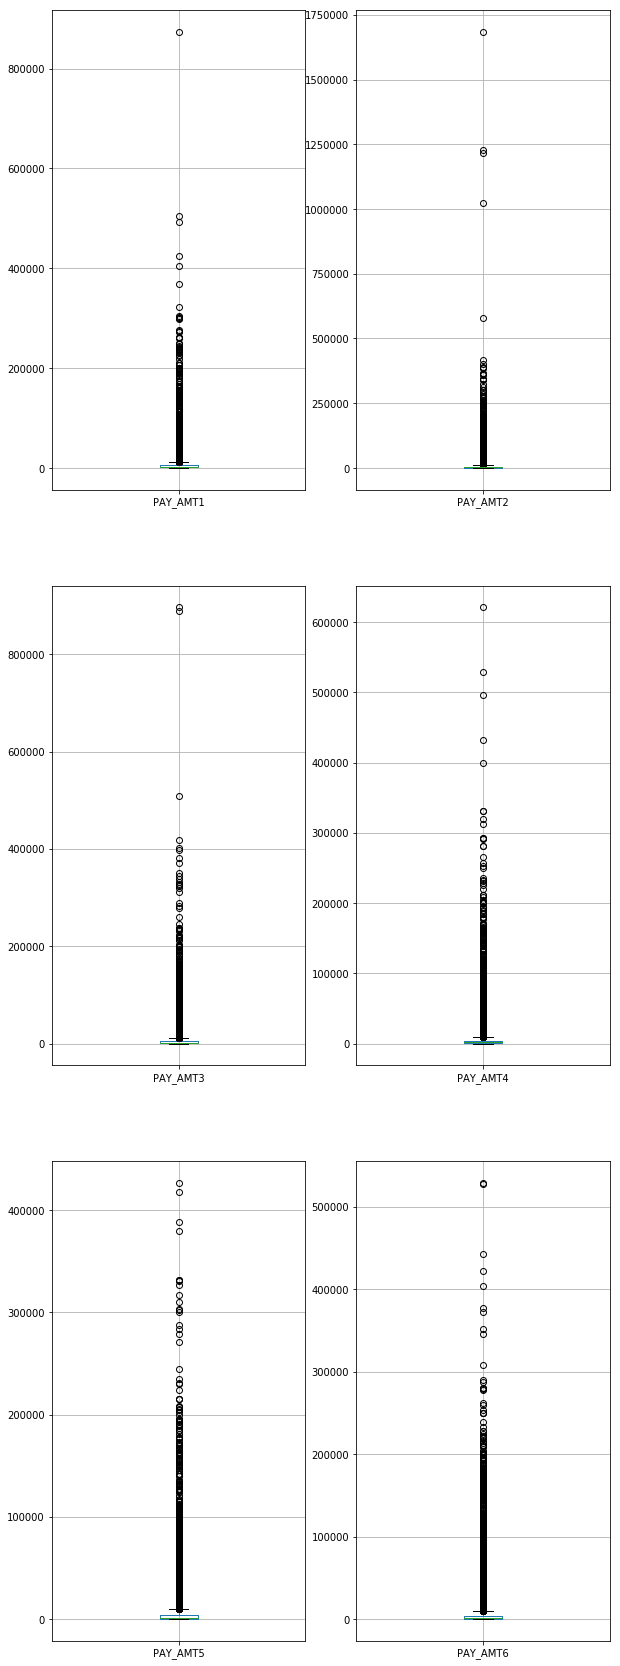

In [16]:
vars_to_plot_separate = [['PAY_AMT1'],['PAY_AMT2'],['PAY_AMT3'],['PAY_AMT4'],['PAY_AMT5'],['PAY_AMT6']]
plt.figure(figsize=(10,30))
for index, plot_vars in enumerate (vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2,
               2,
               index+1)
    ax=df.boxplot(column=plot_vars)
    
plt.show()

The range of values in the amount of Payments made is extremely wide.  This makes visualization difficult, and may make modeling more difficult.  Log, or some other transforms may be appropriate, but we will keep the scale for the purposes of visualization.

Text(0.5,1,'PAY_AMT6 no outlier')

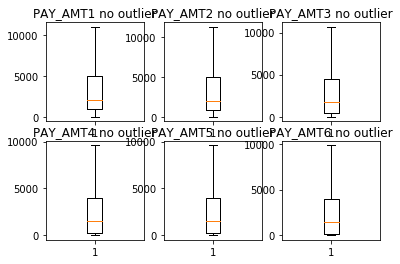

In [17]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(df.PAY_AMT1, 0, '')
axs[0, 0].set_title("PAY_AMT1 no outlier")
axs[0, 1].boxplot(df.PAY_AMT2, 0, '')
axs[0, 1].set_title("PAY_AMT2 no outlier")
axs[0, 2].boxplot(df.PAY_AMT3, 0, '')
axs[0, 2].set_title("PAY_AMT3 no outlier")
axs[1, 0].boxplot(df.PAY_AMT4, 0, '')
axs[1, 0].set_title("PAY_AMT4 no outlier")
axs[1, 1].boxplot(df.PAY_AMT4, 0, '')
axs[1, 1].set_title("PAY_AMT5 no outlier")
axs[1, 2].boxplot(df.PAY_AMT6, 0, '')
axs[1, 2].set_title("PAY_AMT6 no outlier")

Eliminating values above $10,000 (about the 90th percentile) makes the box-plots more interpretable.  The plots look similar from month to month, but the skew seems to be decreasing with time.  These are useful to us in thinking about the modelling.

The charts below look at the distribution of values for Billed Amounts and payments a different way.  The cells below bucket and plot the approximately the bottom 90% of the data, thus enabling us to see the distribution. Ignore the references to Default in these cells.

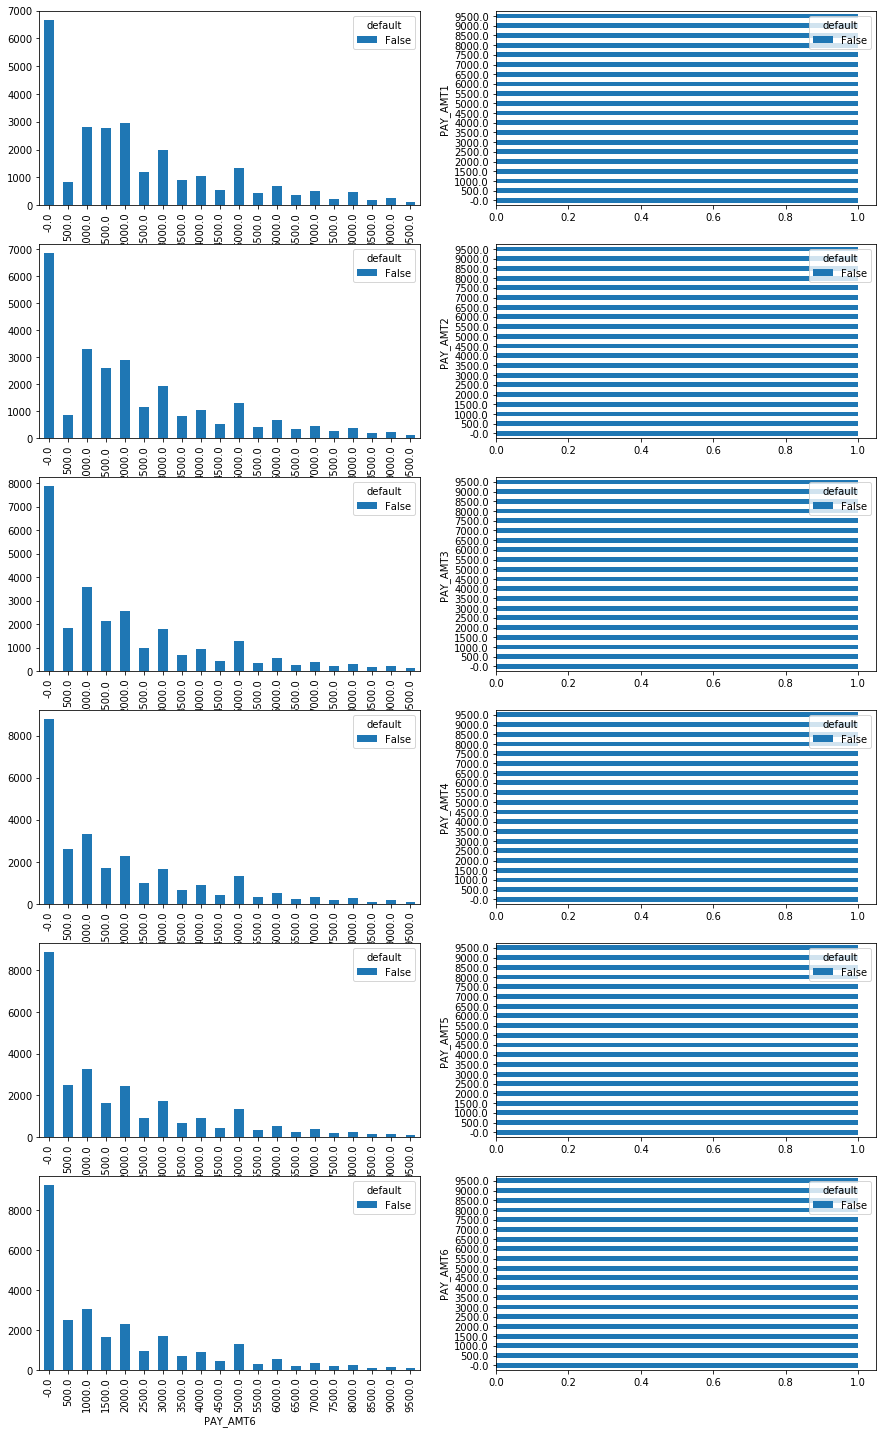

In [18]:
# Bucketing Payment data for payments in $500 increments to $10,000.  Value selected based on 90th percentile
dfPmtsLTD = df[Payments]
dfPmtsLTD = ((dfPmtsLTD.where(dfPmtsLTD<10000))//500)*500

plotVar = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(dfPmtsLTD[feature],dfPmtsLTD.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()

The distributions show a lot of zero payments and bi-modal distributions, with the smaller peak in the $1,000 to $2,499 range.  The smaller mode is getting more pronounced as time goes on which could have modelling implications.

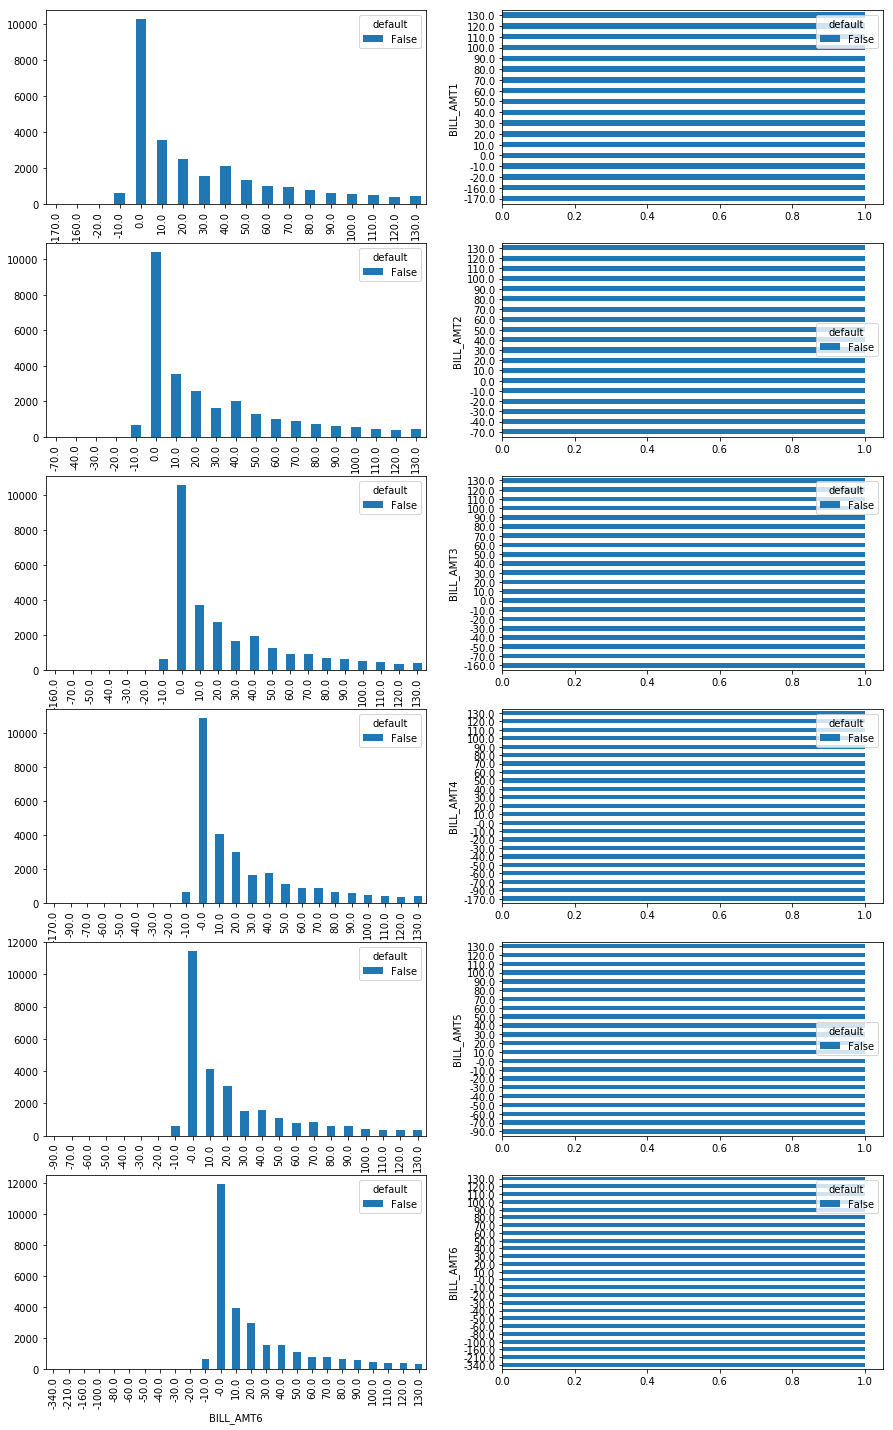

In [19]:
# Bucketing Amount Billed data for payments in $10,000 increments to $140,000.  Value selected based on 90th percentile
# Charts are in $000s.

dfBillsLTD = df[Bills]
dfBillsLTD = ((dfBillsLTD.where(dfBillsLTD<140000))//10000)*10

plotVar = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(dfBillsLTD[feature],dfBillsLTD.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()


Distribution of billed amounts are very right skewed (relative to zero) and seem to have a similar shape through time.  We checked some of the negative balances, and they seem legitimate due to overpayment.

The large number of zero balance observations will need to be considered carefully, and perhaps creatively in the modelling phase.

## Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

#### *_Overview_*

Three of the variables in our data set are Time Series. (Amount Billed, Payment Amount, and Pay which we are calling "Payment Delinquency Status").  We explored the potential for Autocorrelation within these series by reviewing scatterplots. correlation matrices and cross-tabs.  

There are also potential structural relationships between some of the Attributes:
1. The amount of a payment is likely related to the Amount Billed in the prior month, and
2. The Amount Billed should be limited by the Credit Limit.
    
These are explored below.

#### Analyzing Payments for Serial Correlation

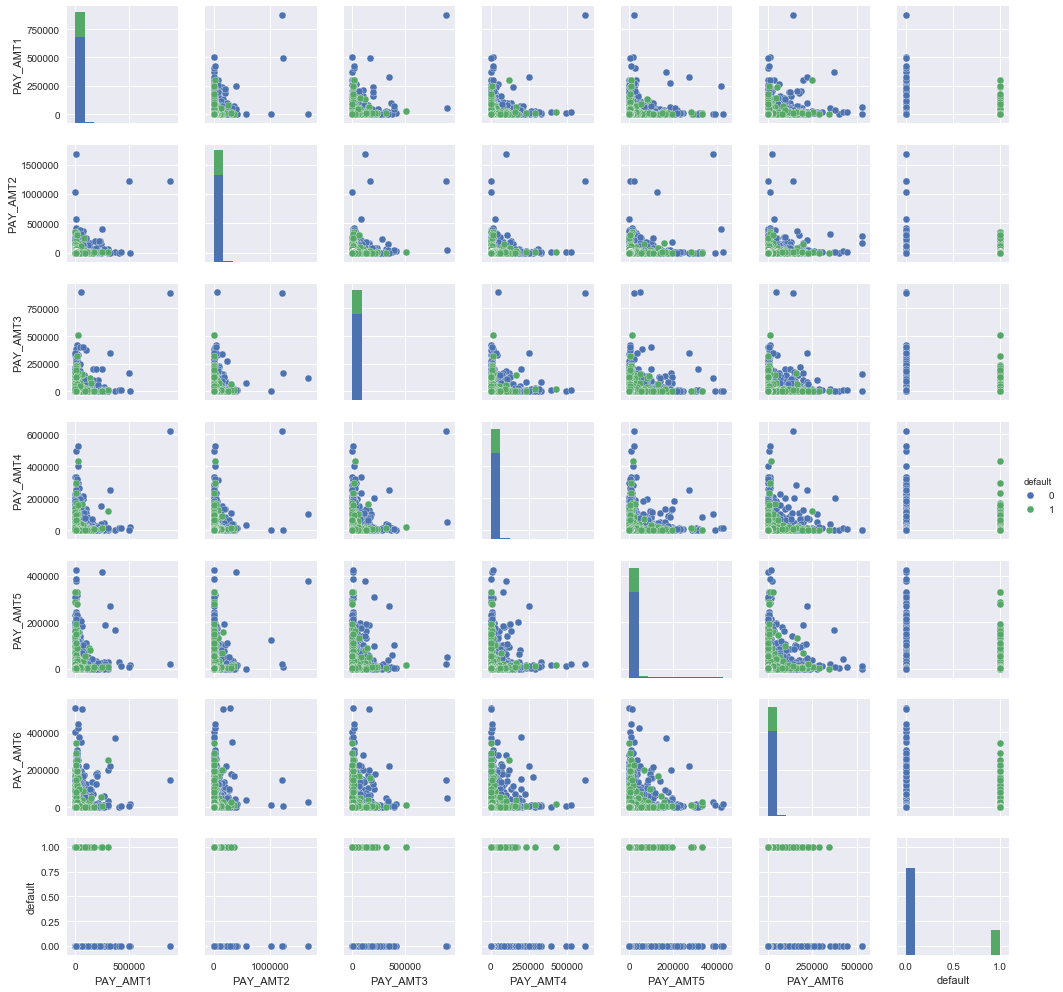

In [20]:
%matplotlib inline
sns.set()
g = sns.pairplot(df[Payments],hue = 'default',size = 2)

In [21]:
df[Payments].corr()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
PAY_AMT1,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.072929
PAY_AMT2,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.058579
PAY_AMT3,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740,-0.056250
PAY_AMT4,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834,-0.056827
PAY_AMT5,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896,-0.055124
PAY_AMT6,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000,-0.053183
default,-0.072929,-0.058579,-0.056250,-0.056827,-0.055124,-0.053183,1.000000


A visual review of scatter plots of the payments in various months does not show obvious serial correlation. However, correlation coefficients approaching 30% in certain cases as indicated in the table above indacate that this is something we need to consider in the modelling phase.

#### Analyzing serial correlation in Billed Amounts and relationship between Billed Amounts and Credit Limits

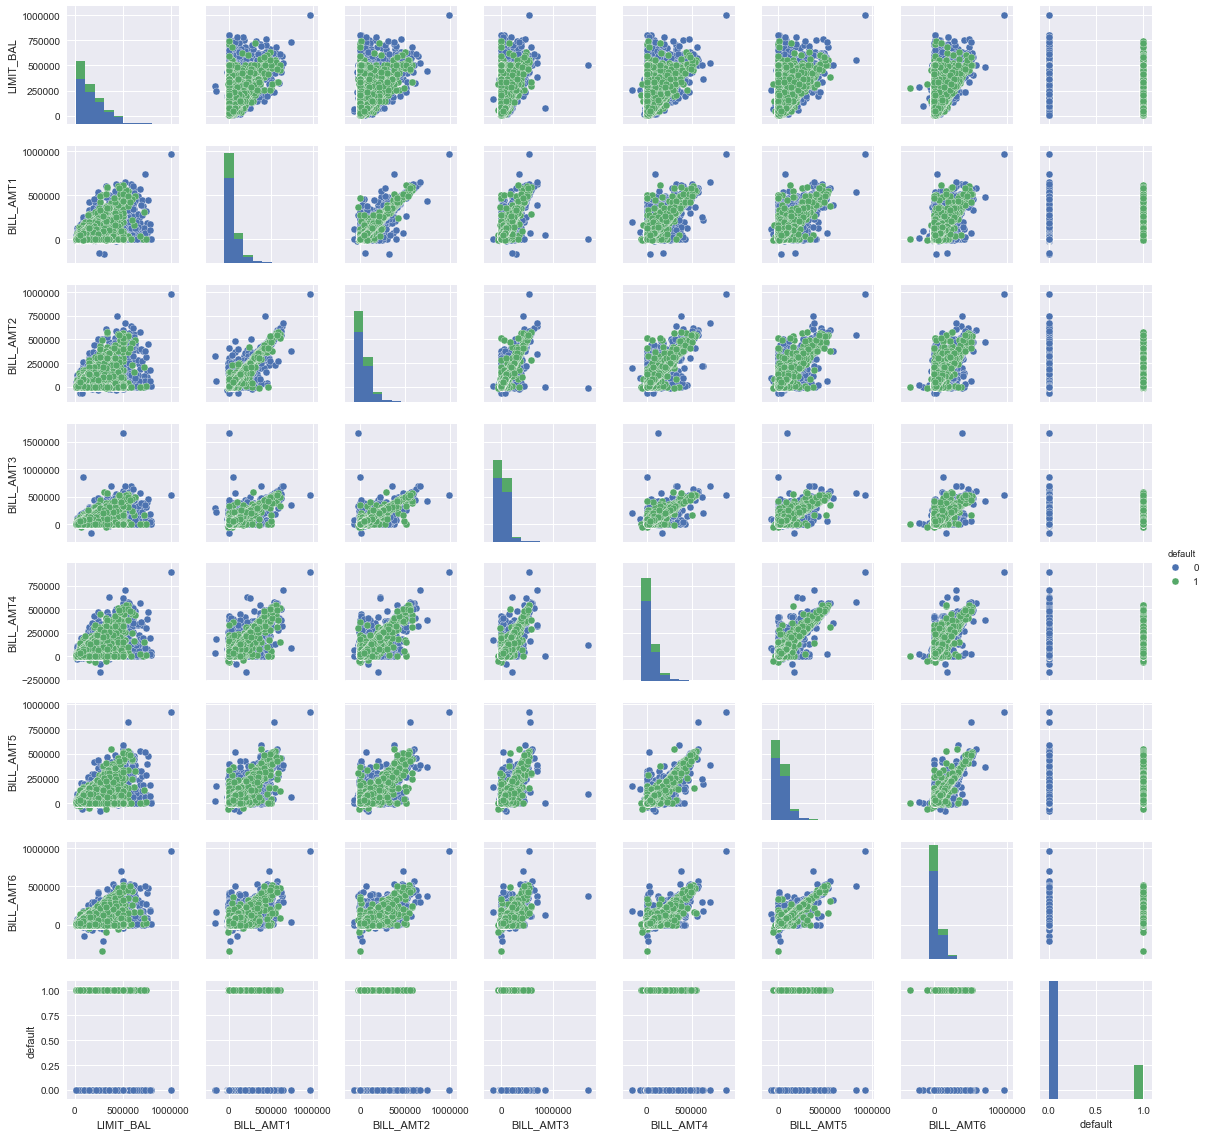

In [22]:
%matplotlib inline
sns.set()
sns.pairplot(df[Bills],hue = 'default',size = 2)

In [23]:
df[Bills].corr()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default
LIMIT_BAL,1.000000,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,-0.153520
BILL_AMT1,0.285430,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,-0.019644
BILL_AMT2,0.278314,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,-0.014193
BILL_AMT3,0.283236,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,-0.014076
BILL_AMT4,0.293988,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,-0.010156
BILL_AMT5,0.295562,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,-0.006760
BILL_AMT6,0.290389,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,-0.005372
default,-0.153520,-0.019644,-0.014193,-0.014076,-0.010156,-0.006760,-0.005372,1.000000


A visual review of the scatter plots above shows clear indication of correlation in Billed Amounts accross different months.  It also shows how the billed amounts tend to be bounded by the Credit Limit.

This is confirmed by the high correlation coefficients in the table above.  We will need to consider mitigation methods in the modelling phase.

#### Analyzing serial correlation in PAY ("Payment Delinquency Status")

In [24]:
# Creating a cross-tab of counts by the value of the ordinal variable to check autocerrelation in
#Payment Status.
# We are showing the migration of statuses from one period to the next.
# The rows are the first period status and the columns are the next period status. 
# This requires re-shaping (stacking) data.

# First, create a single column of all Initial time period statuses,
#regardless of attribute name (month).
InitialList = ['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2']
dfFirstStatus = df[InitialList]
StatusStacked = pd.DataFrame({'First':dfFirstStatus.stack()})
StatusStacked = StatusStacked.reset_index(drop=True)

# Then, create a single column of all subsequent time period statuses, regardless
#of attribute name (month).
NextList = ['PAY_5','PAY_4','PAY_3','PAY_2','PAY_0']
dfNextStatus = df[NextList]
NextStatusStacked = pd.DataFrame({'Next':dfNextStatus.stack()})
NextStatusStacked = NextStatusStacked.reset_index(drop=True)

# Combining the two columns into a single df.
StatusStacked['Next'] = NextStatusStacked['Next']
pd.crosstab(StatusStacked['First'],StatusStacked['Next'])

Next,-2,-1,0,1,2,3,4,5,6,7,8
First,,,,,,,,,,,
-2,17602,1477,1091,1233,253,0,0,0,0,0,0
-1,1904,21915,3476,621,1038,0,0,0,0,0,0
0,4,4106,72148,6,4918,0,0,0,0,0,0
1,0,0,0,34,0,0,0,0,0,0,0
2,10,1306,2814,1676,9460,1031,0,0,0,0,0
3,0,84,92,109,362,176,285,0,0,0,0
4,0,8,8,32,85,29,106,109,0,0,0
5,0,3,3,7,18,7,11,12,50,0,0
6,0,1,1,2,5,1,1,3,4,45,0


The table above shows the propensity of an account to remain in the same status for certain statuses.  We will illustrate how the table above works by describing the first row.  The table shows that there were 17,602+1,477+1,091+1,233+253=21,656 instances where an account had a Pay Status of -2 in a month where the status in the next month is available.  Of those instances, 17,602 also had a Status of -2 in the folowing month, and 1,477 had a Status of -1 in the following month and so on.

The table shows that accounts with initial Statuses of -2 through 2 tend to stay in that status the following month.  Status 1 seems to be a special case discussed in **_Data Quality_**.  We will need to account for this in the modelling phase.

In [25]:
df[PayStausOnly].apply(pd.value_counts)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


The table above shows that a value of 1 for this variable only appears in meaningful amounts in the PAY_0, the most recent month.  It could be that this indicates the creation of a new "Status" or a data issue.

#### Analyzing the relationship between Billed Amounts and the subsequent Payment Amounts

In [ ]:
%matplotlib inline
sns.set()
sns.pairplot(df[BillsAndPayments],hue = 'default',size = 2)

In [ ]:
df[BillsAndPayments].corr()

A visual review of the scatterplots above show that there is a potential relationship between the Billed Amount in one month (e.g. BILL_AMT6) and the resulting payment (e.g. PAY_AMT5).  This is confirmed by the correlation matrix, which indicates that the correlation between the billed amount and the resulting payment is in the 30% range.

The cells below are used to compute the figures quoted in the third point of "Suspicious Values" in the Data Quality section.  Thwe section questions the validity of data points shown as delinquent payments when there was no (positive) outstanding balance.  The code is here because it builds on the previous section.

In [ ]:
#Adding Prior Period Balances to table used for evaluating Status accuracy
BillList = ['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2']
dfPriorBill = df[BillList]

BillStacked = pd.DataFrame({'Billed':dfPriorBill.stack()})
BillStacked = BillStacked.reset_index(drop=True)
StatusStacked['Billed'] = BillStacked['Billed']

In [ ]:
## Checking instances of an account coded as delinquent when Billed amount was zero or less,
ProblemCountV_Minus1 = 0
ProblemCountV_Zero = 0

# Checking Delinquency if Status 0 is Delinquent:
for i in np.arange(0,len(StatusStacked)):
    if StatusStacked['Billed'][i] < 1 and StatusStacked['Next'][i]>-1:
        ProblemCountV_Minus1 = ProblemCountV_Minus1 + 1

# Checking Delinquency if Status 1 only is Delinquent:
for i in np.arange(0,len(StatusStacked)):
    if StatusStacked['Billed'][i] < 1 and StatusStacked['Next'][i]>0:
        ProblemCountV_Zero = ProblemCountV_Zero + 1        
        

print("Versus -1: ", ProblemCountV_Minus1,"Versus 0: ", ProblemCountV_Zero)

There are instances where the Payment Status implies late payment, but the amount billed was zero or less. This seems nonsensical. Thee are 1,769 such cases (out of 150,000 possible payments: 30,000 accounts and 5 months of validatable data) if measured against payment statuses defined as delinquent by the data providers, and 4,702 if we consider Payment Status of zero as delinquent.

## Explore Attributes and Class

In this section we review the various relationships between our various features and there relationship to our target class (default =1). This will allow us to understand certain features or potentially identify new features for use in our model.

We began by exploring the relationships between the available demographic data to the default class.

##### _Customer Demographics and Default_

In [ ]:
#do some transformations
#convert any non-identified education categories to 'OTHER'
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=(0,5,6),value=4)

#convert any non-identified marriage categories to 'OTHER'
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=(0),value=3)

#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

payments = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['TotalMonthsLate'] = df[payments].sum(axis=1)
#transform continuous variables as they each have a mostly exponential distribution
df[continuous_features] = df[continuous_features].replace(to_replace=0,value=np.nan).apply(np.log)

In [ ]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
# cross tabs provide a quick view of the relationships between characteristics of the
#borrower & our target
plotVar = ['SEX','EDUCATION','MARRIAGE','AGE']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(df[feature],df.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()

After reviewing the features from above there are a couple relationships that stand out when comparing the demographic features and the proportion of defaults for our sample. The review of this data below simply addresses the variable relationships to the default class. It does not address the potential ethical or legal concerns of using a customer's demographic information to influence a bank's decision on credit limits or interest rates.

Sex
- There does not appear to be a noticeable difference in the default rates by gender based on a visual inspections. 

Education
- There does seem to pattern between the amount of education people receive and the default rates. Based on the visual inspection of the above data there is some indication that people with higher levels of education default at lower rates.

Marriage
- There does not seem to be any obvious discernable trends based on Marital Status

Age:
- Based on the age variables there is potentially some indications that people in there early 20's are more succeptible to defaulting, however this variable may need to be bucketed differently to better interpret the succeptible age groups. We will cover this in our 'New Features' section.

##### _Payment History and Default_

After looking through the customers demographic history we wanted to explore the relationships between the customers bill payment history to identify any patterns that emerge.

We begin with the relationship between prior payment status (late payments vs ontime)

In [ ]:
plotVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Months Late in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Months Behind Payment Due Date')



From above the customers that defaulted paid there previous bill between .2 to .7 months late on average. Additionally, it appears that as we move closer to the month we are predicting(left to right), the timeliness of the bill payments seems to be getting worse for both groups.

Logically we interpret this to support the notion that people who have trouble paying there previous bills will likely have similar difficulties paying in the future. 

This lends to the potential for a new features that better captures the timeliness of previous payments as well as the status of the last payment (paid or still outstanding).

In order to understand why, we will look at the average of the log transformed bill amounts to see if there is any identifiable pattern.

In [ ]:
plotVar = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Bill Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Bill Amt)')

Interestingly, when looking at the bill amount from the previous months there does not seem to be a considerable difference between the median bill amount between customers that default and those that don't. 

Based on this it would seem that the actual bill amount by itself will offer little insight into the likelihood of default. This is perhaps an indication that it should be considered relative to the total available credit and the prior payments. 

Next we look deeper that log transformed payment amounts.

In [ ]:
plotVar = ['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Pay Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Pay Amt)')

There does appear to be a difference in the median payment amount between the customers that defaulted and those that did not.

It appears that customers that did not default make higher payments against their credit on average than those that do default.

This leads us to question if customers that default are paying less, but maintain a similar bill amount then they are likely using a higher proportion of there credit. We will introduce a new feature that will measure the customer's credit usage in the 'New Features' section.

##### _Summary_

Based on the reviews of the features above it appears that we have several features that have a relationship to our target class. Additionally, we identified several limitations of our current features and have decided to include a several new features that could potentially improve our model.

## New Features

Based on the above analysis we believe we idenfied several new features that we will derive from our existing data. Below we explain the variable and the code used to create it.

##### _Bucketed Age Group_

This will allow us to pick up some of the traits of different age groups and life events. For example young adults (21-28) will likely have a different financial situation than a retiree.

In [ ]:
# Creating Age Buckets
df['Agegroup'] = df['AGE']//10

##### _Credit Usage History_ 

Using the billed amounts relative to the total available credit for each of the customers gives us information on how much available credit they are using and carrying over month to month. This feature will allow us to determine how high consistently high credit usage effects a customer's likelihood of defaulting.

In [ ]:
#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

##### _Late Payments Total_ 

How many times has a customer been late on a payment in the last six months? We saw in the section above that a history of late payments does appear to have a strong relationship with our target variable default.

##### _Changes in Client Behavior_

Trends in Billed Amounts or % of Billed Amounts paid may prove to be related to the propensity to default.

In [ ]:
transformVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for fi,feature in enumerate(transformVar):
    df[feature] = pd.cut(df[feature], [-3,-1,8], 2, labels=[0,1]).astype(np.int64)

df['TotalMonthsLate'] = df[transformVar].sum(axis=1)

## Exceptional Work

In [ ]:
import pandas as pd
df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.index = df.ID
if 'ID' in df:
    del df['ID']
    
df["log_LIMIT_BAL"]=np.log(df.LIMIT_BAL)
df["log_PAY_AMT1"]=np.log(df.PAY_AMT1+1)
df["log_PAY_AMT2"]=np.log(df.PAY_AMT2+1)
df["log_PAY_AMT3"]=np.log(df.PAY_AMT3+1)
df["log_PAY_AMT4"]=np.log(df.PAY_AMT4+1)
df["log_PAY_AMT5"]=np.log(df.PAY_AMT5+1)
df["log_PAY_AMT6"]=np.log(df.PAY_AMT6+1)

from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X=df[['log_LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'log_PAY_AMT1','log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5','log_PAY_AMT6']]
X_pca = pca.fit(X).transform(X)
print ('pca:', pca.components_)

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['log_LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'log_PAY_AMT1','log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5','log_PAY_AMT6']
x = df.loc[:, features].values
y = df.loc[:,['default']].values
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4',
                          'principal component 5','principal component 6', 'principal component 7' ])
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, df[['default']]], axis = 1)

In [ ]:
pca.explained_variance_ratio_

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while we can convert 13 dimensional space to 7 dimensional space, we lose some of the variance (information) when we do this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 51.46% of the variance, the second principal component contains 15.76% of the variance and the third principal component contains 6.99% of the variance and so on. Together, the seven components contain 92.18% of the information.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.pairplot(x_vars=["principal component 1"], y_vars=["principal component 2"], data=finalDf, hue="default", size=5)

Above scatterplot represents 67.21% of the continuus features variance just using first 2 principal components.